In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from blimpy import read_header, Waterfall, Filterbank


%matplotlib inline
import matplotlib.pyplot as plt

import sys, os, glob
sys.path.insert(0, "../../")
import setigen as stg

from astropy import units as u

In [28]:
stg.choppy_rfi_path?

Signature: stg.choppy_rfi_path(f_start, drift_rate, spread, spread_type='uniform')
Docstring:
A crude simulation of one style of RFI that shows up, in which the signal
jumps around in frequency. This example samples the center frequency for
each time sample from either a uniform or normal distribution.

Note: another approach could be to random walk the frequency over time.
File:      /mnt_home/bryanb/setigen/setigen/funcs/paths.py
Type:      function


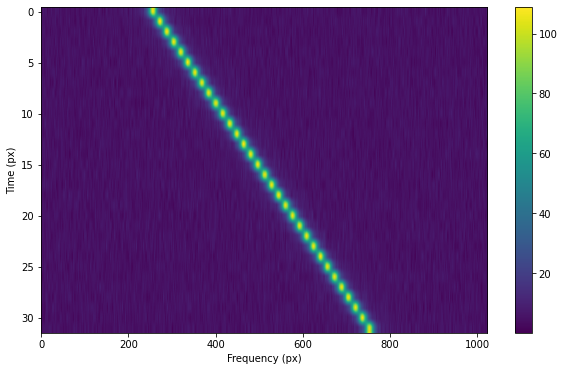

In [55]:
frame = stg.Frame(fchans=1024*u.pixel,
                  tchans=32*u.pixel,
                  df=2.7939677238464355*u.Hz,
                  dt=18.25361108*u.s,
                  fch1=6095.214842353016*u.MHz)
noise = frame.add_noise(x_mean=5, x_std=2, x_min=0)

start_index = 256
end_index = 256*3

drift_rate = frame.get_drift_rate(start_index, end_index)

signal = frame.add_signal(stg.constant_path(f_start = frame.fs[start_index], 
                                            drift_rate = drift_rate),
                          stg.constant_t_profile(level = 100),
                          stg.voigt_f_profile(g_width=30*u.Hz, l_width=30*u.Hz),
                          stg.constant_bp_profile(level = 1))

fig = plt.figure(figsize=(10, 6))
frame.show()

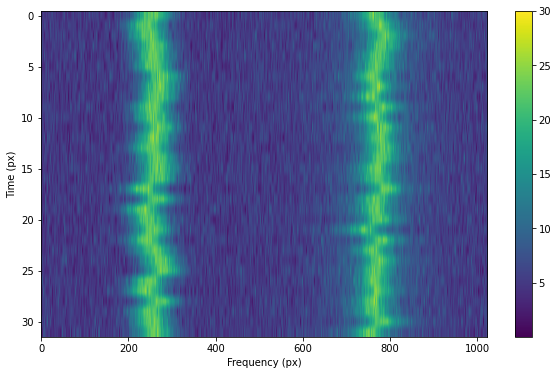

In [60]:
frame = stg.Frame(fchans=1024*u.pixel,
                  tchans=32*u.pixel,
                  df=2.7939677238464355*u.Hz,
                  dt=18.25361108*u.s,
                  fch1=6095.214842353016*u.MHz)
noise = frame.add_noise(x_mean=5, x_std=2, x_min=0)

signal = frame.add_signal(stg.choppy_rfi_path(f_start = frame.fs[256], 
                                              drift_rate = 0*u.Hz/u.s,
                                              spread = 30*u.Hz,
                                              spread_type='normal'),
                          stg.constant_t_profile(level=frame.get_intensity(snr=50)),
                          stg.gaussian_f_profile(width=200*u.Hz),
                          stg.constant_bp_profile(level=1))

signal = frame.add_signal(stg.choppy_rfi_path(f_start = frame.fs[3*256], 
                                              drift_rate = 0*u.Hz/u.s,
                                              spread = 30*u.Hz,
                                              spread_type='normal'),
                          stg.constant_t_profile(level=frame.get_intensity(snr=50)),
                          stg.lorentzian_f_profile(width=200*u.Hz),
                          stg.constant_bp_profile(level=1))

fig = plt.figure(figsize=(10, 6))
frame.show()

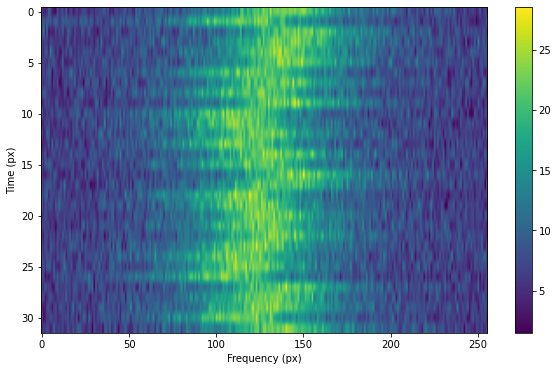

In [68]:
frame = stg.Frame(fchans=256*u.pixel,
                  tchans=32*u.pixel,
                  df=2.7939677238464355*u.Hz,
                  dt=18.25361108*u.s,
                  fch1=6095.214842353016*u.MHz)
noise = frame.add_noise(x_mean=5, x_std=2, x_min=0)

# signal = frame.add_signal(stg.choppy_rfi_path(f_start = frame.fs[256], 
#                                               drift_rate = 0*u.Hz/u.s,
#                                               spread = 30*u.Hz,
#                                               spread_type='normal'),
#                           stg.constant_t_profile(level=frame.get_intensity(snr=50)),
#                           stg.gaussian_f_profile(width=200*u.Hz),
#                           stg.constant_bp_profile(level=1))

signal = frame.add_signal(stg.choppy_rfi_path(f_start = frame.fs[128], 
                                              drift_rate = 0*u.Hz/u.s,
                                              spread = 30*u.Hz,
                                              spread_type='normal'),
                          stg.constant_t_profile(level=frame.get_intensity(snr=50)),
                          stg.lorentzian_f_profile(width=200*u.Hz),
                          stg.constant_bp_profile(level=1))

fig = plt.figure(figsize=(10, 6))
frame.show()

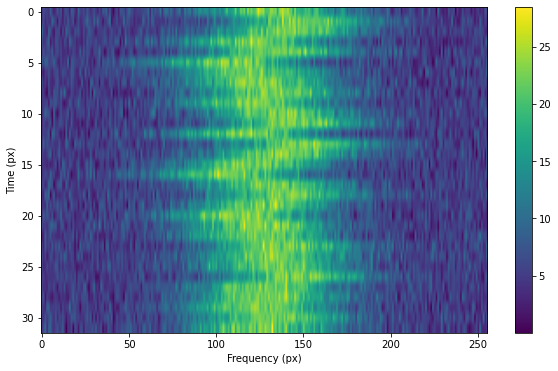

In [62]:
frame = stg.Frame(fchans=256*u.pixel,
                  tchans=32*u.pixel,
                  df=2.7939677238464355*u.Hz,
                  dt=18.25361108*u.s,
                  fch1=6095.214842353016*u.MHz)
noise = frame.add_noise(x_mean=5, x_std=2, x_min=0)

signal = frame.add_signal(stg.choppy_rfi_path(f_start = frame.fs[128], 
                                              drift_rate = 0*u.Hz/u.s,
                                              spread = 30*u.Hz,
                                              spread_type='normal'),
                          stg.constant_t_profile(level=frame.get_intensity(snr=50)),
                          stg.gaussian_f_profile(width=200*u.Hz),
                          stg.constant_bp_profile(level=1))

# signal = frame.add_signal(stg.choppy_rfi_path(f_start = frame.fs[128], 
#                                               drift_rate = 0*u.Hz/u.s,
#                                               spread = 30*u.Hz,
#                                               spread_type='normal'),
#                           stg.constant_t_profile(level=frame.get_intensity(snr=50)),
#                           stg.lorentzian_f_profile(width=200*u.Hz),
#                           stg.constant_bp_profile(level=1))

fig = plt.figure(figsize=(10, 6))
frame.show()